In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import fisher_exact, chi2_contingency

In [2]:
import scipy
scipy.__version__
# scipy.stats.version
scipy.version.full_version
# print(chi2_contingency__version__)

'1.5.2'

In [3]:
# complete path_to_file:

path_to_file = r'D:\Ali USB Backup\Special\Faith Based Representations GMC HEE\combined religion vs speciality (1).xlsx'
# new HEE data updated April 2021: (The GMC data remains the same)
path_to_file = r'D:\Ali USB Backup\Special\Faith Based Representations GMC HEE\combined religion vs speciality v2 HEE data updated.xlsx'

df_GMC = pd.read_excel(path_to_file, engine='openpyxl', sheet_name = 'GMC data', usecols="A:J", nrows=14, index_col=0)  # non-indexed
df_HEE = pd.read_excel(path_to_file, engine='openpyxl', sheet_name = 'HEE data combined', usecols="A:J", nrows=14, index_col=0)  # non-indexed


In [4]:
df_GMC.dropna(axis='rows', how='all')
df_GMC.dropna(axis='columns', how='all')
df_GMC.sum().sum() # GMC

50338.0

In [5]:
df_HEE.dropna(axis='rows', how='all')
df_HEE.dropna(axis='columns', how='all')
df_HEE.sum().sum() # HEE

18222

# Option 1: run one of the two cells below

In [6]:


df = df_GMC
GMC_data = True


In [6]:
df = df_HEE
GMC_data = False

In [7]:
df.dropna(axis='rows', how='all')
df.dropna(axis='columns', how='all')
df.head()

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics and ITU,307,12,239,71,70,6,9,40,153
Emergency medicine,300,24,283,103,259,6,10,48,166
GP,902,149,2060,533,1579,17,65,247,975
Medicine,493,184,675,235,949,20,30,100,458
O&G,131,27,324,101,275,6,9,32,117


# Table 1 in manuscript:

In [8]:


table1 = pd.DataFrame(np.array([
    ['England and Wales (2018)', 42.1, 46.7, 0.5, 1.8, 0.5, 5.7, 0.7, 1.7],
    ['UK doctors (2019)', 19.1, 34.4, 0.5, 2.2, 0.2, 3.7, 1.0, 39.1],
                        ]),
             columns=['stats for', 'Atheist', 'Christian', 'Buddhist', 'Hindu',
                     'Jewish', 'Muslim', 'Sikh', 'Any other religion/unknown'],
#              index=[ ],
            )


table1


,stats for,Atheist,Christian,Buddhist,Hindu,Jewish,Muslim,Sikh,Any other religion/unknown
0,England and Wales (2018),42.1,46.7,0.5,1.8,0.5,5.7,0.7,1.7
1,UK doctors (2019),19.1,34.4,0.5,2.2,0.2,3.7,1.0,39.1


In [9]:
# UK Consultants GMC 2019:

total = df.sum().sum()
if GMC_data:
    porportion = (df.sum()/total).to_frame().rename(columns={0:'Proportion of GMC Registered UK Consultants 2019'})
else:
    porportion = (df.sum()/total).to_frame().rename(columns={0:'Proportion of Junior Doctors Applying to Specialties in 2019'})

# porportion_GMC.to_csv(r'D:\Ali USB Backup\Special\GMC data summary.csv')
porportion*100


,Proportion of Junior Doctors Applying to Specialties in 2019
Atheism,16.908133
Buddhism,2.667106
Christianity,27.719240
Hinduism,8.045220
islam,23.586873
judaism,0.488421
sikh,0.932938
other,4.044562
unknown,15.607507


In [10]:
_GMC_specialist_percentages = np.array([
    0.092367, 0.142800, 0.004138, 0.035330, 0.003823, 0.032408, 0.003641, 0.681481+0.004012]) * 100

table1.loc[2, 'stats for'] = 'GMC Specialist Register (2019)' 
table1.iloc[2, 1:] = _GMC_specialist_percentages

In [11]:
table1

,stats for,Atheist,Christian,Buddhist,Hindu,Jewish,Muslim,Sikh,Any other religion/unknown
0,England and Wales (2018),42.1,46.7,0.5,1.8,0.5,5.7,0.7,1.7
1,UK doctors (2019),19.1,34.4,0.5,2.2,0.2,3.7,1.0,39.1
2,GMC Specialist Register (2019),9.2367,14.28,0.4138,3.533,0.3823,3.2408,0.3641,68.5493


In [12]:
# table1.to_csv(r'D:\Ali USB Backup\Special\GMC data summmary 2 in context.csv')

In [13]:
table1.drop(columns='stats for', inplace=True)

In [14]:
table1 = table1.astype('float')
table1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3 entries, 0 to 2
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Atheist                     3 non-null      float64
 1   Christian                   3 non-null      float64
 2   Buddhist                    3 non-null      float64
 3   Hindu                       3 non-null      float64
 4   Jewish                      3 non-null      float64
 5   Muslim                      3 non-null      float64
 6   Sikh                        3 non-null      float64
 7   Any other religion/unknown  3 non-null      float64
dtypes: float64(8)
memory usage: 296.0 bytes


# OPTION 2: can skip. DOES NOT EXCLUDE DATA. IMPUTES/REDISTRIBUTES from unknown religious affiliations to RELIGIONS by specialty 

In [15]:
# GMC data included 45,574 doctors from a total of 143081

GMC_total = 143081
GMC_unknown = GMC_total - 45574
GMC_unknown_proportion = GMC_unknown / GMC_total  # 0.652

# find the proportions of data to move from unknown to the religious affiliations. 
# this can be the UK doctor proportions or the general Egnalnd and Wales porportions.

# # UK doctors proportion: multiply the UK doctors percentages with the raw unkwon and prefer not to say numbers:

# table1 = table1.drop(columns='stats for').astype('float')
# unknown_to_atheist = table1.loc[1, 'Atheist'] - table1.loc[2, 'Atheist']
# unknown_to_christian = table1.loc[1, 'Christian'] - table1.loc[2, 'Christian']
# unknown_to_jewish = table1.loc[1, 'Buddhist'] - table1.loc[2, 'Buddhist']
# unknown_to_muslim = table1.loc[1, 'Muslim'] - table1.loc[2, 'Muslim']
# unknown_to_sikh = table1.loc[1, 'Sikh'] - table1.loc[2, 'Sikh']

In [17]:
# unknown_to_atheist + unknown_to_christian+ unknown_to_jewish + unknown_to_muslim + unknown_to_sikh

In [18]:
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics and ITU,307,12,239,71,70,6,9,40,153
Emergency medicine,300,24,283,103,259,6,10,48,166
GP,902,149,2060,533,1579,17,65,247,975
Medicine,493,184,675,235,949,20,30,100,458
O&G,131,27,324,101,275,6,9,32,117
occupational medicine,2,0,12,2,3,1,0,3,2
opthalmology,49,9,91,19,77,3,3,21,84
Paediatrics,152,16,306,73,250,6,4,36,114
pathology,33,2,52,13,31,2,0,13,38
Pschiatry,133,17,166,39,101,0,6,33,88


In [19]:
# try cramers V:



In [20]:
# now distribute this extra data per religion, by existing specialty proportions.
# this assumed null hypothesis of no signfiicant difference between general UK doctors and specialist register


In [21]:
# # UK doctors proportion: simply multiply the UK doctors percentages with the raw ROW unknown and prefer not to say numbers:
# # i.e. impute by specialty, the unknowns, based on the proportions of UK doctors. 
# #  manual test follow below


# df_altered = df.copy()
# df_altered.loc['anaesthesia', 'Atheism'] = ( df.loc['anaesthesia', 'Atheism'] + 
#     (df.loc['anaesthesia', 'unknown and prefer not to say'] * table1.loc[1, 'Atheist'])/100
# )

In [22]:
# df_altered

In [23]:
# manual check to get 2586: 
(0.191*6850)+1278

2586.35

In [24]:
# now define the function to impute these:

def impute_redistribute(df_altered, specialty_col, religion_col, 
                       table1, population_religion, use_UK_doctors=True, GMC=True):
    """
    use_UK_doctors is when imputing using general UK doctor data to redistribute the unkowns by religious affiliations.
        If False, then uses England and Wales general population data instead. i.e two methods of imputing. 
    
    
    """
    
    if use_UK_doctors == True:
        population = 1
    else:
        population = 0
    if GMC:
        redistribute_col = 'unknown and prefer not to say'
    elif not GMC:
        redistribute_col = 'unknown'
    impute_amount = (
            df_altered.loc[specialty_col, redistribute_col] * table1.loc[population, population_religion]/100
        )
    
    # actual imputation:
    df_altered.loc[specialty_col, religion_col] = ( 
        df_altered.loc[specialty_col, religion_col] + impute_amount
          )
    
    return df_altered

In [25]:
# set up to cycle using above function

specialty_cols = list(df.index)
religion_cols = list(df.columns)
population_religions = list(table1.columns)

In [26]:
population_religions

['Atheist',
 'Christian',
 'Buddhist',
 'Hindu',
 'Jewish',
 'Muslim',
 'Sikh',
 'Any other religion/unknown']

In [27]:
religion_cols.pop(-1)
religion_cols

['Atheism',
 'Buddhism',
 'Christianity',
 'Hinduism',
 'islam',
 'judaism',
 'sikh',
 'other']

In [28]:
specialty_cols

['Anaesthetics and ITU',
 'Emergency medicine',
 'GP',
 'Medicine',
 'O&G',
 'occupational medicine',
 'opthalmology',
 'Paediatrics',
 'pathology',
 'Pschiatry',
 'public health',
 'radiology',
 'Surgery',
 'other']

## Option 2.1
### careful below: chose only one homogenisation option

In [29]:
# homogenise names for GMC

table1.rename(columns={'Atheist': 'Atheism',
                       'Christian': 'christian',
                      'Buddhist': 'buddhist',
                      'Hindu': 'hindu',
                      'Jewish': 'jewish',
                       'Muslim': 'muslim',
                      'Sikh': 'sikh',
                       'Any other religion/unknown': 'other',
                      }, inplace=True)

GMC_impute = True  # set to true if GMC data, False if HEE data.

In [29]:
# homogenise names for HEE

table1.rename(columns={'Atheist': 'Atheism',
                       'Christian': 'Christianity',
                      'Buddhist': 'Buddhism',
                      'Hindu': 'Hinduism',
                      'Jewish': 'judaism',
                       'Muslim': 'islam',
                      'Sikh': 'sikh',
                       'Any other religion/unknown': 'other',
                      }, inplace=True)

GMC_impute = False  # set to true if GMC data, False if HEE data.

## Option 2.2
### chose whether to impute/redistribute data based on the UK Doctors' or England and Wales data.Comment one out.


In [30]:

# for England and Wales:
use_UK_doctors = False

# for UK Doctors' Data Default:
# use_UK_doctors = True

In [31]:
# now cycle using above:
 

In [32]:
df_altered = df.copy()

for specialty_col in specialty_cols:
    for religion_col in religion_cols:
        
        df_altered = impute_redistribute(df_altered, specialty_col, religion_col, 
                           table1, population_religion=religion_col, 
                                         use_UK_doctors=use_UK_doctors, GMC=GMC_impute)     

In [33]:
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics and ITU,307,12,239,71,70,6,9,40,153
Emergency medicine,300,24,283,103,259,6,10,48,166
GP,902,149,2060,533,1579,17,65,247,975
Medicine,493,184,675,235,949,20,30,100,458
O&G,131,27,324,101,275,6,9,32,117
occupational medicine,2,0,12,2,3,1,0,3,2
opthalmology,49,9,91,19,77,3,3,21,84
Paediatrics,152,16,306,73,250,6,4,36,114
pathology,33,2,52,13,31,2,0,13,38
Pschiatry,133,17,166,39,101,0,6,33,88


In [34]:
# now inspect result

In [35]:
df_altered

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics and ITU,371.413,12.765,310.451,73.754,78.721,6.765,10.071,42.601,153
Emergency medicine,369.886,24.830,360.522,105.988,268.462,6.830,11.162,50.822,166
GP,1312.475,153.875,2515.325,550.550,1634.575,21.875,71.825,263.575,975
Medicine,685.818,186.290,888.886,243.244,975.106,22.290,33.206,107.786,458
O&G,180.257,27.585,378.639,103.106,281.669,6.585,9.819,33.989,117
occupational medicine,2.842,0.010,12.934,2.036,3.114,1.010,0.014,3.034,2
opthalmology,84.364,9.420,130.228,20.512,81.788,3.420,3.588,22.428,84
Paediatrics,199.994,16.570,359.238,75.052,256.498,6.570,4.798,37.938,114
pathology,48.998,2.190,69.746,13.684,33.166,2.190,0.266,13.646,38
Pschiatry,170.048,17.440,207.096,40.584,106.016,0.440,6.616,34.496,88


In [36]:
df_altered - df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics and ITU,64.413,0.765,71.451,2.754,8.721,0.765,1.071,2.601,0
Emergency medicine,69.886,0.830,77.522,2.988,9.462,0.830,1.162,2.822,0
GP,410.475,4.875,455.325,17.550,55.575,4.875,6.825,16.575,0
Medicine,192.818,2.290,213.886,8.244,26.106,2.290,3.206,7.786,0
O&G,49.257,0.585,54.639,2.106,6.669,0.585,0.819,1.989,0
occupational medicine,0.842,0.010,0.934,0.036,0.114,0.010,0.014,0.034,0
opthalmology,35.364,0.420,39.228,1.512,4.788,0.420,0.588,1.428,0
Paediatrics,47.994,0.570,53.238,2.052,6.498,0.570,0.798,1.938,0
pathology,15.998,0.190,17.746,0.684,2.166,0.190,0.266,0.646,0
Pschiatry,37.048,0.440,41.096,1.584,5.016,0.440,0.616,1.496,0


In [37]:

# now just delete the unkown and prefer not to say religious affiliation col as it's served its purpose:
# have to merge other and unkowns here given the way the data was presented in Table1 "other/unkown" combined:

if GMC_impute:
    del(df_altered['unknown and prefer not to say'])
elif not GMC_impute:
    del(df_altered['unknown'])

df_altered

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other
Anaesthetics and ITU,371.413,12.765,310.451,73.754,78.721,6.765,10.071,42.601
Emergency medicine,369.886,24.830,360.522,105.988,268.462,6.830,11.162,50.822
GP,1312.475,153.875,2515.325,550.550,1634.575,21.875,71.825,263.575
Medicine,685.818,186.290,888.886,243.244,975.106,22.290,33.206,107.786
O&G,180.257,27.585,378.639,103.106,281.669,6.585,9.819,33.989
occupational medicine,2.842,0.010,12.934,2.036,3.114,1.010,0.014,3.034
opthalmology,84.364,9.420,130.228,20.512,81.788,3.420,3.588,22.428
Paediatrics,199.994,16.570,359.238,75.052,256.498,6.570,4.798,37.938
pathology,48.998,2.190,69.746,13.684,33.166,2.190,0.266,13.646
Pschiatry,170.048,17.440,207.096,40.584,106.016,0.440,6.616,34.496


In [38]:
# sweet, so now we have df_altered and can proceed

df = df_altered.copy()

In [39]:
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other
Anaesthetics and ITU,371.413,12.765,310.451,73.754,78.721,6.765,10.071,42.601
Emergency medicine,369.886,24.830,360.522,105.988,268.462,6.830,11.162,50.822
GP,1312.475,153.875,2515.325,550.550,1634.575,21.875,71.825,263.575
Medicine,685.818,186.290,888.886,243.244,975.106,22.290,33.206,107.786
O&G,180.257,27.585,378.639,103.106,281.669,6.585,9.819,33.989
occupational medicine,2.842,0.010,12.934,2.036,3.114,1.010,0.014,3.034
opthalmology,84.364,9.420,130.228,20.512,81.788,3.420,3.588,22.428
Paediatrics,199.994,16.570,359.238,75.052,256.498,6.570,4.798,37.938
pathology,48.998,2.190,69.746,13.684,33.166,2.190,0.266,13.646
Pschiatry,170.048,17.440,207.096,40.584,106.016,0.440,6.616,34.496


# option 3

In [15]:
# comment out at least one of the below

exclude = []  # i.e. ALL DATA # GMC 9 cols, HEE 9 cols
# exclude = ['unknown and prefer not to say', 'other']  # GMC =7 cols
# exclude = ['unknown', 'other']  # HEE =7 cols
# exclude = ['other'] # HEE/GMC exclude after imputation

df.drop(columns=exclude, inplace=True)

In [16]:
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics and ITU,307,12,239,71,70,6,9,40,153
Emergency medicine,300,24,283,103,259,6,10,48,166
GP,902,149,2060,533,1579,17,65,247,975
Medicine,493,184,675,235,949,20,30,100,458
O&G,131,27,324,101,275,6,9,32,117
occupational medicine,2,0,12,2,3,1,0,3,2
opthalmology,49,9,91,19,77,3,3,21,84
Paediatrics,152,16,306,73,250,6,4,36,114
pathology,33,2,52,13,31,2,0,13,38
Pschiatry,133,17,166,39,101,0,6,33,88


In [17]:
df.sum().sum()

18222

# overall chi-squared

### For GMC

In [18]:
chi, p, dof, exp = chi2_contingency(df, correction=True)

chi, p, dof

(1101.5389951094373, 2.7846916664287663e-166, 104)

In [19]:
chi, p, dof, exp = chi2_contingency(df, correction=True, lambda_="log-likelihood")

chi, p, dof



(1089.2016824566795, 7.495841378268349e-164, 104)

    ### --> for GMC data the chi2 analysis is significant for the entire data (chi2 = 3010, p=0.0, dof= 104)
    ### as it is for 7 columns (removed other/unknown prefer not to say): (1083.9460733276355, 6.733454346030107e-177, 78)

### for HEE

In [20]:
chi, p, dof, exp = chi2_contingency(df, correction=True)

chi, p, dof

(1101.5389951094373, 2.7846916664287663e-166, 104)

In [21]:
chi, p, dof, exp = chi2_contingency(df, correction=True, lambda_="log-likelihood")

chi, p, dof

(1089.2016824566795, 7.495841378268349e-164, 104)

### --> for HEE data the chi2 analysis is significant for the entire data (chi2 = 1101, p=2.78x10-166, dof= 104)

### excluding unknown and other: (941, 2.28e-148, 78)

### overall expected df:

In [22]:
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics and ITU,307,12,239,71,70,6,9,40,153
Emergency medicine,300,24,283,103,259,6,10,48,166
GP,902,149,2060,533,1579,17,65,247,975
Medicine,493,184,675,235,949,20,30,100,458
O&G,131,27,324,101,275,6,9,32,117
occupational medicine,2,0,12,2,3,1,0,3,2
opthalmology,49,9,91,19,77,3,3,21,84
Paediatrics,152,16,306,73,250,6,4,36,114
pathology,33,2,52,13,31,2,0,13,38
Pschiatry,133,17,166,39,101,0,6,33,88


# now ready to do multiple chisquared for all columns and rows
# i.e. 14 rows and 9 columns if no dropna

In [23]:
#THIS

try:

    list_all_religions = [i for i in list(df.columns) if i not in exclude]
    
except NameError:
    list_all_religions = [i for i in list(df.columns)]

In [24]:
#THIS

for religion in list_all_religions:  # cycle through all religious affiliations
    print('\n\nReligion: ', religion)
    
    

    df['Other Religion'] = df[[i for i in list_all_religions if i not in [religion]]].sum(axis='columns')



    
    chi, p_value, dof, exp = chi2_contingency(df[[religion, 'Other Religion']])
    


    if p_value < (0.005/672):  # global bonferroni for all specialties and religions

        print(religion, ' vs other: chi-sq of all specialties is significant with correction for multiple comparisons.')
        print('chi_sq = ', chi)
        print('p value = ', p_value)
        print('dof = ', dof)
        print('expected: ', exp)


        



Religion:  Atheism
Atheism  vs other: chi-sq of all specialties is significant with correction for multiple comparisons.
chi_sq =  366.2852226740763
p value =  2.893771149030658e-70
dof =  13
expected:  [[1.53356767e+02 7.53643233e+02]
 [2.02728515e+02 9.96271485e+02]
 [1.10359384e+03 5.42340616e+03]
 [5.31591702e+02 2.61240830e+03]
 [1.72801120e+02 8.49198880e+02]
 [4.22703326e+00 2.07729667e+01]
 [6.01929536e+01 2.95807046e+02]
 [1.61810833e+02 7.95189167e+02]
 [3.11109648e+01 1.52889035e+02]
 [9.85744155e+01 4.84425584e+02]
 [1.30699868e+02 6.42300132e+02]
 [1.63501646e+02 8.03498354e+02]
 [2.65626770e+02 1.30537323e+03]
 [1.18356931e+00 5.81643069e+00]]


Religion:  Buddhism
Buddhism  vs other: chi-sq of all specialties is significant with correction for multiple comparisons.
chi_sq =  167.4034775103872
p value =  6.219490764093976e-29
dof =  13
expected:  [[2.41906487e+01 8.82809351e+02]
 [3.19785973e+01 1.16702140e+03]
 [1.74081989e+02 6.35291801e+03]
 [8.38538031e+01 3.0601462

### using all the GMC data, all religions are chi2 significant. same for HEE. if excluding the unknown and prefer not to say, same results except Sikhism and Hinduism no longer significant on HEE only. also if using global bonferroni 672, sikh and buddhism results as a col are not significant. 

In [25]:
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown,Other Religion
Anaesthetics and ITU,307,12,239,71,70,6,9,40,153,754
Emergency medicine,300,24,283,103,259,6,10,48,166,1033
GP,902,149,2060,533,1579,17,65,247,975,5552
Medicine,493,184,675,235,949,20,30,100,458,2686
O&G,131,27,324,101,275,6,9,32,117,905
occupational medicine,2,0,12,2,3,1,0,3,2,23
opthalmology,49,9,91,19,77,3,3,21,84,272
Paediatrics,152,16,306,73,250,6,4,36,114,843
pathology,33,2,52,13,31,2,0,13,38,146
Pschiatry,133,17,166,39,101,0,6,33,88,495


## now for chi2/fisher for each cell (9*14):

# update bonferroni correction: x 4:

# number of calculations = 672
# 0.005 / 672 = 7.4e-6


# make into exp_df and then diff_df: UNCOMMENT exp_df_GMC two cells below

In [26]:
# THIS
# initialise
exp_df_GMC = pd.DataFrame().reindex_like(df)
exp_df_GMC.drop(columns='Other Religion', inplace=True)


exp_df_HEE = pd.DataFrame().reindex_like(df)
exp_df_HEE.drop(columns='Other Religion', inplace=True)

In [27]:
# THIS
# COMMENT OUT EITHER #1 or #2

# the below has been validated by hand for muslim/medicine and anaesthetist/Atheist...
# ...in terms of 2 x 2 contingency table formulation.


for religion in list_all_religions:  # cycle through all religious affiliations
    print('\n\nReligion: ', religion)
    
    for specialty in df.index:
        analysis_df = pd.DataFrame()
        analysis_df[religion] = df[religion]
        analysis_df['Other Religion'] = df[[i for i in list_all_religions if i not in [religion]]].sum(axis='columns')
        analysis_df.loc['Other Specialty']  = df.loc[[i for i in df.index if i not in [specialty]]].sum(axis='rows')
        
        temp_df = df.drop(columns=[religion, 'Other Religion'], index=specialty)
        analysis_df.loc['Other Specialty', 'Other Religion'] = temp_df.sum().sum()

        chi, p_value, dof, exp = chi2_contingency(analysis_df.loc[[specialty,'Other Specialty']]
                                                    )
    
        # all GMC
#         exp_df.loc[specialty, religion] = (round(exp[0][0]))
    
        bonferroni = 2*(df.drop(columns='Other Religion').shape[0]*df.drop(columns='Other Religion').shape[1])
        bonferroni = 672
        if p_value < (0.005/bonferroni):  # bonferroni for all specialties and religions multiplied

            # populate only statistically significant
            
            #1:
            if GMC_data:
                exp_df_GMC.loc[specialty, religion] = (round(exp[0][0]))
            
            #2
            elif not GMC_data:
                exp_df_HEE.loc[specialty, religion] = (round(exp[0][0]))



#             exp_df.loc[specialty, religion] = exp_df.loc[specialty, religion] +r'*'
            
            
            print(religion, specialty, ' vs other: 2x2 chi-sq significant with correction for multiple comparisons.')
#             print('chi_sq = ', chi)
            print('p value = ', round(p_value,2))
            print('dof = ', dof)
            print('expected: ', exp[0][0])

            if exp[0][0] <5:
                print()
                print()
                print('noooooooooooooooooooooooooooooooooooooooooooooooo!')
                print(religion, specialty)



Religion:  Atheism
Atheism Anaesthetics and ITU  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  153.35676654593348
Atheism Emergency medicine  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  202.72851498189002
Atheism GP  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  1103.5938426078367
Atheism public health  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  130.6998682910767


Religion:  Buddhism
Buddhism Medicine  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  83.85380309515969


Religion:  Christianity
Christianity GP  vs other: 2x2 chi-sq significant with correction for multiple comparisons.
p value =  0.0
dof =  1
expected:  1809.2348260344638
Christianity Medicine  vs othe

In [29]:
# exp_df_GMC  # exp _df 2 x 2 chi 2 GMC

In [30]:
bonferroni

672

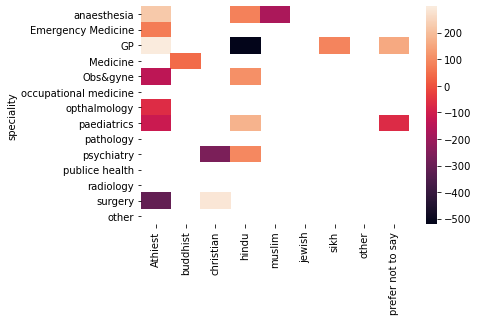

In [31]:
# GMC all

import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.drop(columns='Other Religion') - exp_df_GMC)
plt.show()

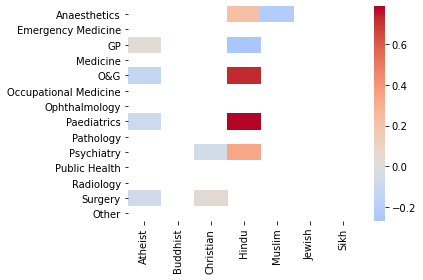

In [58]:
# GMC only statistically significant: normalise wrt expected USE THIS

import seaborn as sns
import matplotlib.pyplot as plt

normalise_index_names={'anaesthesia': "Anaesthetics", 'Obs&gyne': "O&G", "paediatrics":"Paediatrics",
                        'psychiatry': "Psychiatry", 
                       "surgery": "Surgery", 
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                       'publice health': 'Public Health',
                      }

norm_cols = {'Atheism': 'Atheist',
             'buddhist': 'Buddhist',
             'christian': 'Christian',
             'hindu': 'Hindu',
             'muslim': 'Muslim',
             'jewish': 'Jewish',
             'sikh': 'Sikh',
             'unknown and prefer not to say': 'unknown',
             'other': 'Unknown*'
            }
    

exp_df_GMC.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)


## define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_GMC
normalised_diff_df = diff_df/exp_df_GMC

sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)

# plt.title('GMC Specialist Registrations: \nImputed Using England & Wales Population')
# plt.title('GMC Specialist Registrations: Imputed Using \nEngland & Wales Population Then Excluded Unknowns')
# plt.title('GMC Specialist Registrations: \nExcluded Unknown Religious Affiliation')
# plt.title('GMC Specialist Registrations: \nAll Data')
# plt.title('GMC Specialist Registrations: \nImputed Using UK Doctors\' Data')
# plt.title('GMC Specialist Registrations: \nImputed Using UK Doctors\' Data Then Excluded Unknowns')


plt.tight_layout()
# plt.savefig(r'D:\Ali USB Backup\Special\star_GMC_Excluded_Bonferroni672_alpha0.005_notitle.png', format='png', dpi=1000)
# plt.savefig(r'D:\Ali USB Backup\Special\star_GMC_imputed_Bonferroni672_alpha0.005_notitle.png', format='png', dpi=1000)
# plt.savefig(r'D:\Ali USB Backup\Special\star_GMC_imputedTHENExcluded_Bonferroni672_alpha0.005_notitle.png', format='png', dpi=1000)
plt.savefig(r'D:\Ali USB Backup\Special\star_GMC_imputedEnglandWalesTHENExcluded_Bonferroni672_alpha0.005_notitle.png', format='png', dpi=1000)

plt.show()

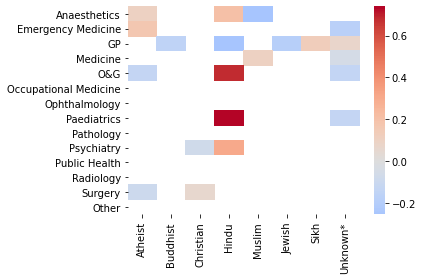

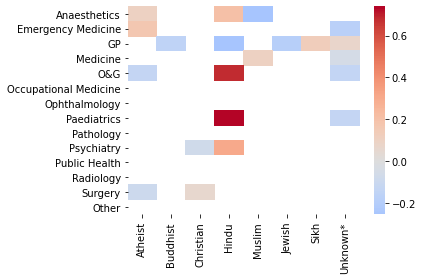

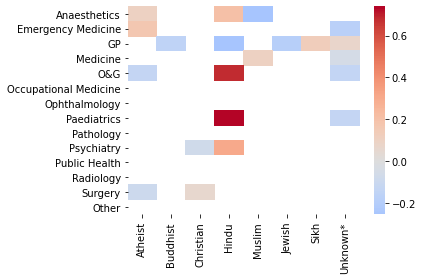

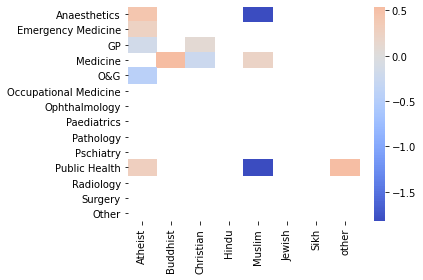

In [51]:
# # HEE only statistically significant

# import seaborn as sns
# import matplotlib.pyplot as plt


# normalise_index_names={'Emergency medicine': "Emergency Medicine",
#                         'psychiatry': "Psychiatry", 
#                       'occupational medicine': 'Occupational Medicine',
#                       'opthalmology': 'Ophthalmology',
#                       'pathology': "Pathology",
#                       'public health': 'Public Health',
#                       'radiology': 'Radiology',
#                       'other': 'Other',
#                       }

# norm_cols = {'Atheism': 'Atheist',
#              'Buddhism': 'Buddhist',
#              'Christianity': 'Christian',
#              'Hinduism': 'Hindu',
# #              'Islam': 'Muslim',
#              'islam': 'Muslim',
#              'judaism': 'Jewish',
#              'sikh': 'Sikh',
#             }


# exp_df_HEE.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
# df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)

# # define diff_df
# diff_df = df.drop(columns='Other Religion') - exp_df_HEE
# normalised_diff_df = diff_df/df.drop(columns='Other Religion')

# # plot:
# sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)  # coolwarm, RdGy_r

# # plt.title('HEE Applications')
# plt.tight_layout()
# # DONT SAVE THIS ONE - USE ONE BELOW
# # plt.savefig(r'D:\Ali USB Backup\Special\HEE_significant_normalised_alpha_0.005_title.jpg', format='jpg', dpi=1000)
# plt.show()

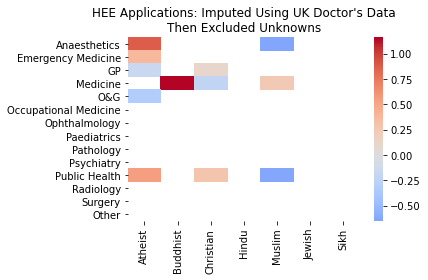

In [54]:
# # HEE only statistically significant - divide by expected USE THIS

# import seaborn as sns
# import matplotlib.pyplot as plt


# normalise_index_names={'Emergency medicine': "Emergency Medicine",
#                         'psychiatry': "Psychiatry",
#                        "Pschiatry": "Psychiatry",
#                       'occupational medicine': 'Occupational Medicine',
#                       'opthalmology': 'Ophthalmology',
#                       'pathology': "Pathology",
#                       'public health': 'Public Health',
#                       'radiology': 'Radiology',
#                       'other': 'Other',
#                       }

# norm_cols = {'Atheism': 'Atheist',
#              'Buddhism': 'Buddhist',
#              'Christianity': 'Christian',
#              'Hinduism': 'Hindu',
# #              'Islam': 'Muslim',
#              'islam': 'Muslim',
#              'judaism': 'Jewish',
#              'sikh': 'Sikh',
# #              'other': 'Unknown*'
#             }


# exp_df_HEE.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
# df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)

# # define diff_df
# diff_df = df.drop(columns='Other Religion') - exp_df_HEE
# normalised_diff_df = diff_df/exp_df_HEE

# # plot:
# sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)  # coolwarm, RdGy_r

# # plt.title('HEE Applications:\nExcluding Unknown Religious Affiliations')
# # plt.title('HEE Applications: All Data')
# # plt.title('HEE Applications: \nImputed Using UK Doctor\'s Data')
# plt.title('HEE Applications: Imputed Using UK Doctor\'s Data\nThen Excluded Unknowns')
# # plt.title('HEE Applications: Imputed Using England & Wales Data\nThen Excluded Unknowns')


# plt.tight_layout()
# # plt.savefig(r'D:\Ali USB Backup\Special\star_HEE_Excluding_Bonferroni672_alpha0.005_notitle.png', format='png', dpi=1000)
# # plt.savefig(r'D:\Ali USB Backup\Special\star_HEE_ALLDATA_Bonferroni672_alpha0.005_notitle.png', format='png', dpi=1000)
# # plt.savefig(r'D:\Ali USB Backup\Special\star_HEE_imputed_Bonferroni672_alpha0.005_notitle.png', format='png', dpi=1000)
# plt.savefig(r'D:\Ali USB Backup\Special\star_HEE_imputedTHENExcluded_Bonferroni672_alpha0.005.png', format='png', dpi=1000)
# # plt.savefig(r'D:\Ali USB Backup\Special\star_HEE_imputedEnglandWalesTHENExcluded_Bonferroni672_alpha0.005.png', format='png', dpi=1000)


# plt.show()

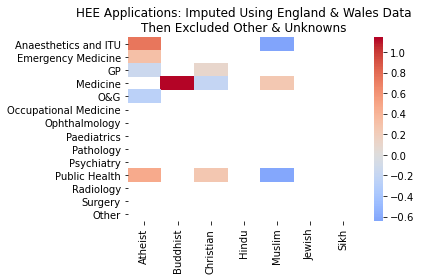

In [56]:
# HEE only statistically significant - divide by expected USE THIS

import seaborn as sns
import matplotlib.pyplot as plt


normalise_index_names={'Emergency medicine': "Emergency Medicine",
                        'psychiatry': "Psychiatry",
                       "Pschiatry": "Psychiatry",
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'Buddhism': 'Buddhist',
             'Christianity': 'Christian',
             'Hinduism': 'Hindu',
#              'Islam': 'Muslim',
             'islam': 'Muslim',
             'judaism': 'Jewish',
             'sikh': 'Sikh',
             'other': 'Unknown*'
            }


exp_df_HEE.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)

# define diff_df
diff_df = df.drop(columns='Other Religion') - exp_df_HEE
normalised_diff_df = diff_df/exp_df_HEE

# plot:
sns.heatmap(normalised_diff_df, cmap='coolwarm', center=0)  # coolwarm, RdGy_r

# plt.title('HEE Applications:\nExcluding Unknown & Other Religious Affiliations')
# plt.title('HEE Applications: All Data')
# plt.title('HEE Applications: \nImputed Using UK Doctor\'s Data\n(merged other and unknowns)')
# plt.title('HEE Applications: Imputed Using UK Doctor\'s Data\nThen Excluded Other & Unknowns')
# plt.title('HEE Applications: Imputed Using England & Wales Data\n(merged other and unknowns)')
plt.title('HEE Applications: Imputed Using England & Wales Data\nThen Excluded Other & Unknowns')


plt.tight_layout()
# plt.savefig(r'D:\Ali USB Backup\Special\star_HEE_Excluding_Bonferroni672_alpha0.005_notitle.png', format='png', dpi=1000)
# plt.savefig(r'D:\Ali USB Backup\Special\star_HEE_imputed_Bonferroni672_alpha0.005_notitle.png', format='png', dpi=1000)
# plt.savefig(r'D:\Ali USB Backup\Special\star_HEE_imputedTHENExcluded_Bonferroni672_alpha0.005.png', format='png', dpi=1000)
# plt.savefig(r'D:\Ali USB Backup\Special\star_HEE_imputedEnglandWalesTHENExcluded_Bonferroni672_alpha0.005.png', format='png', dpi=1000)

# plt.savefig(r'D:\Ali USB Backup\Special\Faith Based Representations GMC HEE\Figures\chi sq heatmaps\updated HEE\star_HEE_Excluding_Bonferroni672_alpha0.005_notitle.png', format='png', dpi=1000)
# plt.savefig(r'D:\Ali USB Backup\Special\Faith Based Representations GMC HEE\Figures\chi sq heatmaps\updated HEE\star_HEE_ALLDATA_Bonferroni672_alpha0.005.png', format='png', dpi=1000)
# plt.savefig(r'D:\Ali USB Backup\Special\Faith Based Representations GMC HEE\Figures\chi sq heatmaps\updated HEE\star_HEE_imputed_all_Bonferroni672_alpha0.005.png', format='png', dpi=1000)
# plt.savefig(r'D:\Ali USB Backup\Special\Faith Based Representations GMC HEE\Figures\chi sq heatmaps\updated HEE\star_HEE_imputedTHENExcluded_Bonferroni672_alpha0.005.png', format='png', dpi=1000)
# plt.savefig(r'D:\Ali USB Backup\Special\Faith Based Representations GMC HEE\Figures\chi sq heatmaps\updated HEE\HEE_imputedEnglandWales.png', format='png', dpi=1000)
# plt.savefig(r'D:\Ali USB Backup\Special\Faith Based Representations GMC HEE\Figures\chi sq heatmaps\updated HEE\HEE_imputedEnglandWales_ThenExcludedUnknowns.png', format='png', dpi=1000)


plt.show()

In [27]:
# ferroro next?

# can ignore everything below here, except Theil's U

# GMC - HEE : if when multiplied = negative 
# this looks at over or under represented if the reverse is true in applications

In [42]:
df_inference = pd.DataFrame().reindex_like(exp_df_GMC)

for i in range(len(df_inference.index)):
    for j in range(len(df_inference.columns)):
        
        if exp_df_GMC.iloc[i,j] * exp_df_HEE.iloc[i,j] < 0:
            df_inference.iloc[i,j] = exp_df_GMC.iloc[i,j] - exp_df_HEE.iloc[i,j]
            
df_inference

,Atheism,buddhist,christian,hindu,muslim,jewish,sikh
anaesthesia,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Emergency Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GP,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Obs&gyne,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupational medicine,NaN,NaN,NaN,NaN,NaN,NaN,NaN
opthalmology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
paediatrics,NaN,NaN,NaN,NaN,NaN,NaN,NaN
pathology,NaN,NaN,NaN,NaN,NaN,NaN,NaN
psychiatry,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Cramer's V or Theil's U

In [ ]:
%who

In [28]:
df

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown,Other Religion
Anaesthetics and ITU,307,12,239,71,70,6,9,40,153,754
Emergency medicine,300,24,283,103,259,6,10,48,166,1033
GP,902,149,2060,533,1579,17,65,247,975,5552
Medicine,493,184,675,235,949,20,30,100,458,2686
O&G,131,27,324,101,275,6,9,32,117,905
occupational medicine,2,0,12,2,3,1,0,3,2,23
opthalmology,49,9,91,19,77,3,3,21,84,272
Paediatrics,152,16,306,73,250,6,4,36,114,843
pathology,33,2,52,13,31,2,0,13,38,146
Pschiatry,133,17,166,39,101,0,6,33,88,495


In [29]:
# HEE

normalise_index_names={'Emergency medicine': "Emergency Medicine",
                        'psychiatry': "Psychiatry",
                       "Pschiatry": "Psychiatry",
                      'occupational medicine': 'Occupational Medicine',
                      'opthalmology': 'Ophthalmology',
                      'pathology': "Pathology",
                      'public health': 'Public Health',
                      'radiology': 'Radiology',
                      'other': 'Other',
                      }

norm_cols = {'Atheism': 'Atheist',
             'Buddhism': 'Buddhist',
             'Christianity': 'Christian',
             'Hinduism': 'Hindu',
#              'Islam': 'Muslim',
             'islam': 'Muslim',
             'judaism': 'Jewish',
             'sikh': 'Sikh',
             'other': 'Unknown*'
            }

df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)

df

,Atheist,Buddhist,Christian,Hindu,Muslim,Jewish,Sikh,Unknown*,unknown,Other Religion
Anaesthetics and ITU,307,12,239,71,70,6,9,40,153,754
Emergency Medicine,300,24,283,103,259,6,10,48,166,1033
GP,902,149,2060,533,1579,17,65,247,975,5552
Medicine,493,184,675,235,949,20,30,100,458,2686
O&G,131,27,324,101,275,6,9,32,117,905
Occupational Medicine,2,0,12,2,3,1,0,3,2,23
Ophthalmology,49,9,91,19,77,3,3,21,84,272
Paediatrics,152,16,306,73,250,6,4,36,114,843
Pathology,33,2,52,13,31,2,0,13,38,146
Psychiatry,133,17,166,39,101,0,6,33,88,495


In [30]:
df.drop(columns=['Other Religion', 'other', 'unknown', 'prefer not to say'], inplace=True, errors='ignore')
df

,Atheist,Buddhist,Christian,Hindu,Muslim,Jewish,Sikh,Unknown*
Anaesthetics and ITU,307,12,239,71,70,6,9,40
Emergency Medicine,300,24,283,103,259,6,10,48
GP,902,149,2060,533,1579,17,65,247
Medicine,493,184,675,235,949,20,30,100
O&G,131,27,324,101,275,6,9,32
Occupational Medicine,2,0,12,2,3,1,0,3
Ophthalmology,49,9,91,19,77,3,3,21
Paediatrics,152,16,306,73,250,6,4,36
Pathology,33,2,52,13,31,2,0,13
Psychiatry,133,17,166,39,101,0,6,33


In [31]:
if GMC_data:
    df = df.astype('int16')
    df.fillna(0, inplace=True)
    
    normalise_index_names={'anaesthesia': "Anaesthetics", 'Obs&gyne': "O&G", "paediatrics":"Paediatrics",
                            'psychiatry': "Psychiatry", 
                           "surgery": "Surgery", 
                          'occupational medicine': 'Occupational Medicine',
                          'opthalmology': 'Ophthalmology',
                          'pathology': "Pathology",
                          'public health': 'Public Health',
                          'radiology': 'Radiology',
                          'other': 'Other',
                           'publice health': 'Public Health',
                          }

    norm_cols = {'Atheism': 'Atheist',
                 'buddhist': 'Buddhist',
                 'christian': 'Christian',
                 'hindu': 'Hindu',
                 'muslim': 'Muslim',
                 'jewish': 'Jewish',
                 'sikh': 'Sikh',
                 'unknown and prefer not to say': 'unknown',
                 'other': 'Unknown*'
                }
    
    df.rename(index=normalise_index_names, columns=norm_cols, inplace=True)
    
df

,Atheist,Buddhist,Christian,Hindu,Muslim,Jewish,Sikh,Unknown*
Anaesthetics and ITU,307,12,239,71,70,6,9,40
Emergency Medicine,300,24,283,103,259,6,10,48
GP,902,149,2060,533,1579,17,65,247
Medicine,493,184,675,235,949,20,30,100
O&G,131,27,324,101,275,6,9,32
Occupational Medicine,2,0,12,2,3,1,0,3
Ophthalmology,49,9,91,19,77,3,3,21
Paediatrics,152,16,306,73,250,6,4,36
Pathology,33,2,52,13,31,2,0,13
Psychiatry,133,17,166,39,101,0,6,33


In [32]:

def make_df_datamatrix(df, i = 'Anaesthetics', j = 'Atheist'):
    total_no_ppl = df.sum().sum()
    df_datamatrix = pd.DataFrame(index=range(0, total_no_ppl), columns=['Specialty', 'Religion'])

    start_row = 0
    no_rows = (df.loc[i, j]) -1
    if no_rows < 1: 
        pass

    else:
        df_datamatrix.loc[start_row : no_rows, ['Specialty', 'Religion']] = i, j
    # start_row = start_row + no_rows

    return df_datamatrix.loc[df_datamatrix.Specialty.notnull()]

In [33]:
# dm1 =  make_df_datamatrix(df, i = 'Anaesthetics', j = 'Atheist')
# dm2 =  make_df_datamatrix(df, i = 'Anaesthetics', j = 'Buddhist')
# DM = dm1.append(dm2)

# dm3 =  make_df_datamatrix(df, i = 'Anaesthetics', j = df.columns[2])  #
# DM = dm1.append([dm2, dm3])

In [34]:
def iterate_make_df(df):
    for i in df.index:
        for j in df.columns:
            dm =  make_df_datamatrix(df, i=i, j=j)  #
            try:
                DM = DM.append(dm, ignore_index=True)
            except UnboundLocalError:
                DM = dm
    return DM

In [35]:
# del(DM)
DM = iterate_make_df(df)
DM.head()

,Specialty,Religion
0,Anaesthetics and ITU,Atheist
1,Anaesthetics and ITU,Atheist
2,Anaesthetics and ITU,Atheist
3,Anaesthetics and ITU,Atheist
4,Anaesthetics and ITU,Atheist


In [36]:
DM = pd.get_dummies(DM)

In [37]:
DM.head()

,Specialty_Anaesthetics and ITU,Specialty_Emergency Medicine,Specialty_GP,Specialty_Medicine,Specialty_O&G,Specialty_Occupational Medicine,Specialty_Ophthalmology,Specialty_Other,Specialty_Paediatrics,Specialty_Pathology,...,Specialty_Radiology,Specialty_Surgery,Religion_Atheist,Religion_Buddhist,Religion_Christian,Religion_Hindu,Religion_Jewish,Religion_Muslim,Religion_Sikh,Religion_Unknown*
0,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [38]:
df.sum().sum()

15378

In [41]:
import sys
sys.path.insert(0, r"C:\Users\ali_m\AnacondaProjects\PhD\Epilepsy_Surgery_Project")
# from crosstab.Semiology_Crosstab.Semiology_Crosstab_exclude_files_with_outcome_8 import*
# from crosstab.Semiology_Crosstab.main_dataframe import*
# from crosstab.outcomes import*
from Stats.performance_metrics import *
from Stats.model_performance import *
# from Sklearn_and_plots.plot_coefficients_all import plot_coefficients_all


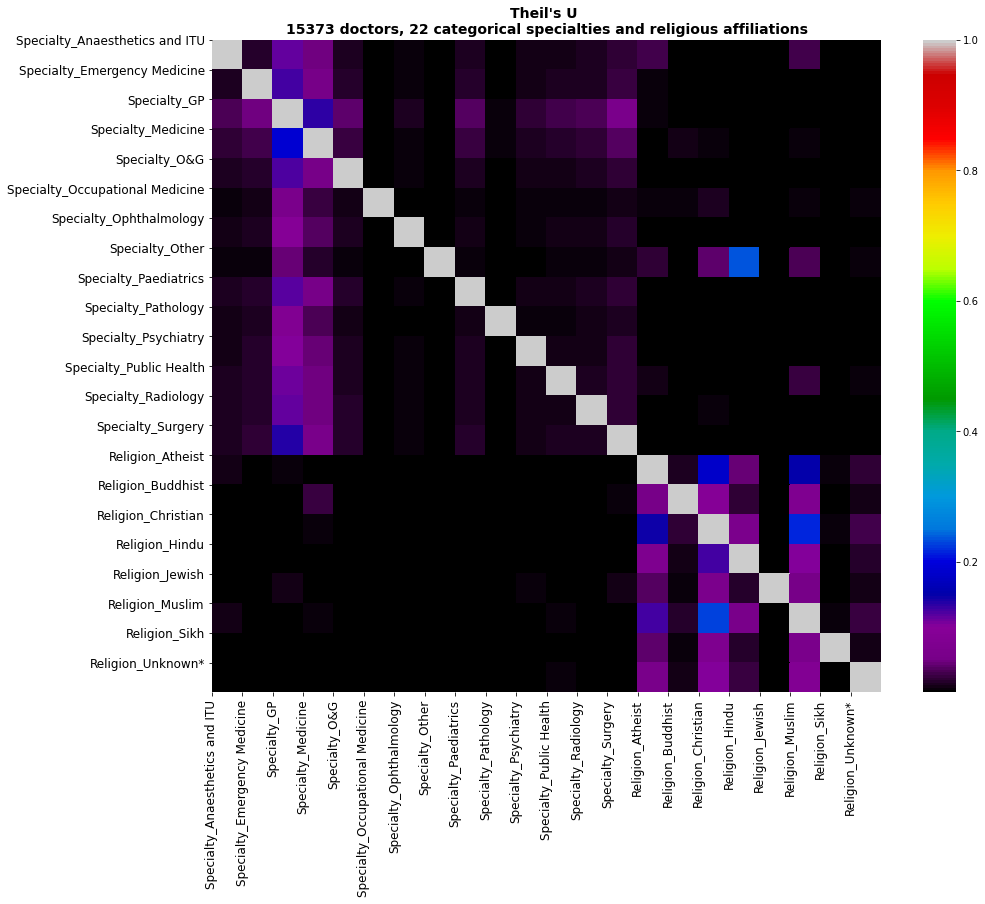

In [42]:
# HEE


# plot
corr_GMC_exclude = associations(DM, 
                          nominal_columns='all', mark_columns=False, Theils_U=True, plot=True,
                          return_results = True, 
                          savefigure=True, path_name='D:\\Ali USB Backup\\Special\\Faith Based Representations GMC HEE\\Figures\\chi sq heatmaps\\updated HEE\\HEE_NMI_excluded_unknowns_other_nipy_spectral.png',
                          title_auto=False, cmap='nipy_spectral',
                           figsize=(15, 12),
                               )


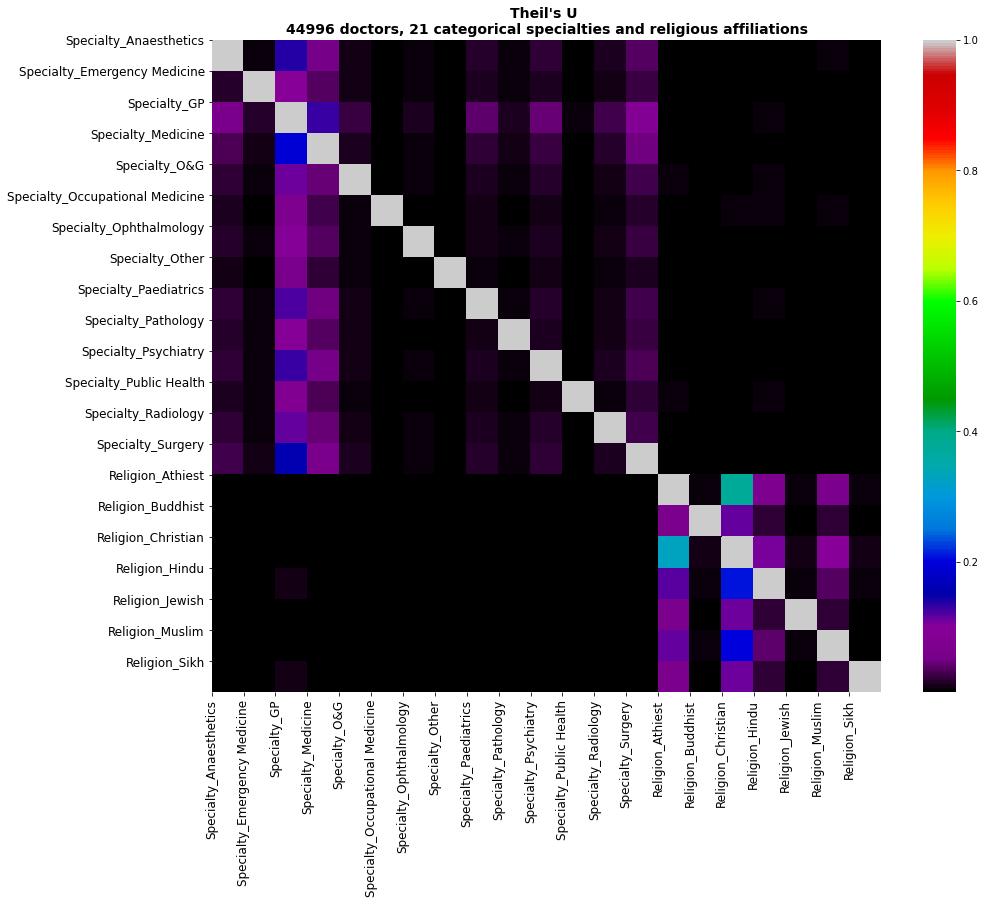

In [64]:
# GMC

# plot
corr_GMC_exclude = associations(DM, 
                          nominal_columns='all', mark_columns=False, Theils_U=True, plot=True,
                          return_results = True, 
                          savefigure=True, path_name='D:\\Ali USB Backup\\Special\\Faith Based Representations GMC HEE\\Figures\\GMC_NMI_excluded_unknowns_other_nipy_spectral.png',
                          title_auto=False, cmap='nipy_spectral',
                           figsize=(15, 12),
                               )


In [ ]:
# oldies

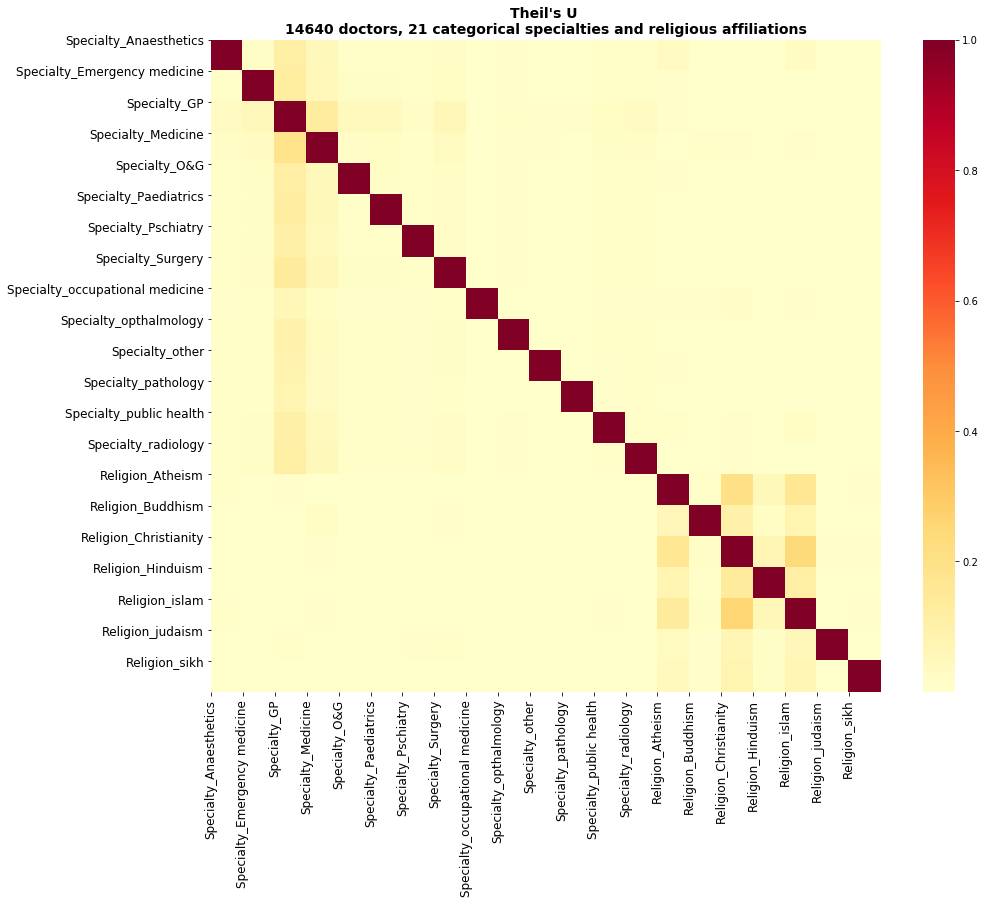

In [27]:



# # rearrange columns
# X_HS_model = X_HS_model[[c for c in X_HS_model if c not in ['EZ', 'Hippocampal Sclerosis', 'SVC SoS', 'SVC SoS+HS', 'GB SoS', 'GB SoS+HS']] + ['Hippocampal Sclerosis', 'SVC SoS', 'SVC SoS+HS', 'GB SoS', 'GB SoS+HS', 'EZ']]


# plot
corr_GMC_exclude = associations(DM, 
                          nominal_columns='all', mark_columns=False, Theils_U=True, plot=True,
                          return_results = True, 
                          savefigure=True, path_name='D:\\Ali USB Backup\\Special\\Mo Jo Theils U HEE exclude.jpg',
                          title_auto=False, #cmap='coolwarm',
                       figsize=(15, 12),
                               )


UnboundLocalError: local variable 'title' referenced before assignment

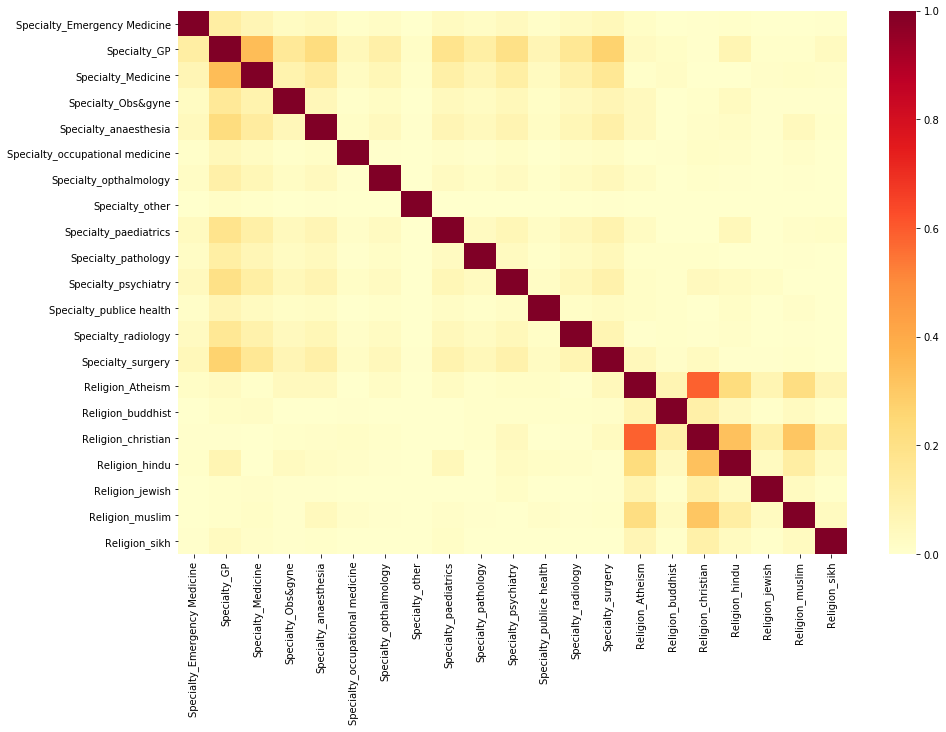

In [23]:
corr_GMC_exclude = associations(DM, 
                          nominal_columns='all', mark_columns=False, Theils_U=False, plot=True,
                          return_results = True, 
                          savefigure=False, #path_name = 'D:\\Ali USB Backup\\Special\\Mo Jo Cramers V GMC exclude.jpg',
                          title_auto=False, 
                       figsize=(15, 10),
                               )

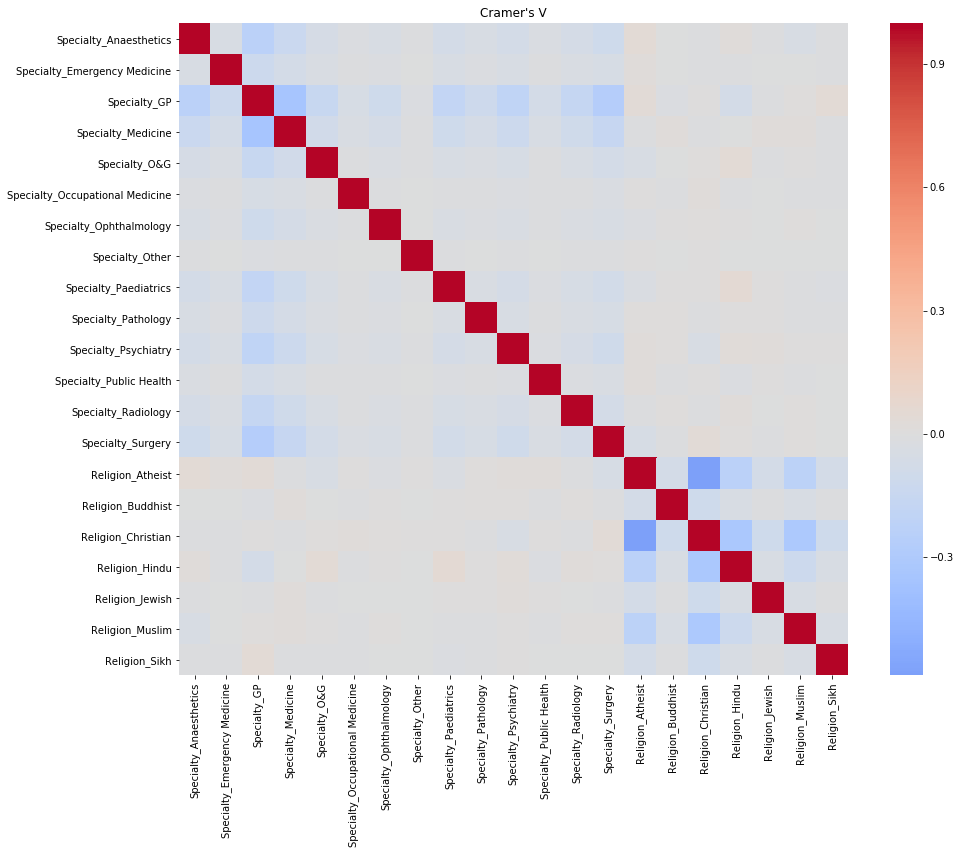

In [58]:
plt.figure(figsize=(15,12))
plt.title('Cramer\'s V')
sns.heatmap(DM.corr('pearson'), cmap='coolwarm', center=0)

# Relative Risks and p values and 95% CI

In [3]:
# default is Yates' correction
# Buddhist Medicine

chi2_contingency([
    [177,309],
    [2807, 14929],
])

(144.99016287206368,
 2.1582989218871587e-33,
 1,
 array([[   79.58643398,   406.41356602],
        [ 2904.41356602, 14831.58643398]]))

In [ ]:
# check data

In [5]:
df_HEE

,Atheism,Buddhism,Christianity,Hinduism,islam,judaism,sikh,other,unknown
Anaesthetics,307,12,239,71,70,6,9,40,153
Emergency medicine,300,24,283,103,259,6,10,48,166
GP,902,149,2060,533,1579,17,65,247,975
Medicine,464,177,635,226,899,20,30,91,442
O&G,108,24,302,93,263,6,9,29,105
occupational medicine,2,0,12,2,3,1,0,3,2
opthalmology,49,9,95,21,81,3,3,21,86
Paediatrics,155,19,316,76,266,6,4,40,118
pathology,33,2,52,13,31,2,0,13,38
Pschiatry,133,17,166,39,101,0,6,33,88
